
=== Carbon Footprint Monitoring Tool ===
1. Input Energy Consumption Data
2. View All Carbon Footprint Reports
3. View Summary of All Reports
4. Visualize Contributions (Pie Chart)
5. Visualize Trends (Line Chart)
6. Exit
Choose an option (1-6): 1

Enter Energy Consumption Data:
Electricity consumption (kWh): 180
Gas consumption (cubic meters): 45
Fuel consumption (liters): 56
Transport emissions (km driven): 230
Enter the date (YYYY-MM-DD) or leave blank for today: 2022-12-6

=== Carbon Footprint Report ===
Date: 2022-12-06
Electricity Consumption: 180.0 kWh
Gas Consumption: 45.0 cubic meters
Fuel Consumption: 56.0 liters
Transport Emissions: 230.0 km
Total Carbon Footprint: 343.3 kg CO2

=== Carbon Footprint Monitoring Tool ===
1. Input Energy Consumption Data
2. View All Carbon Footprint Reports
3. View Summary of All Reports
4. Visualize Contributions (Pie Chart)
5. Visualize Trends (Line Chart)
6. Exit
Choose an option (1-6): 1

Enter Energy Consumption Data:
Electricity consumpt

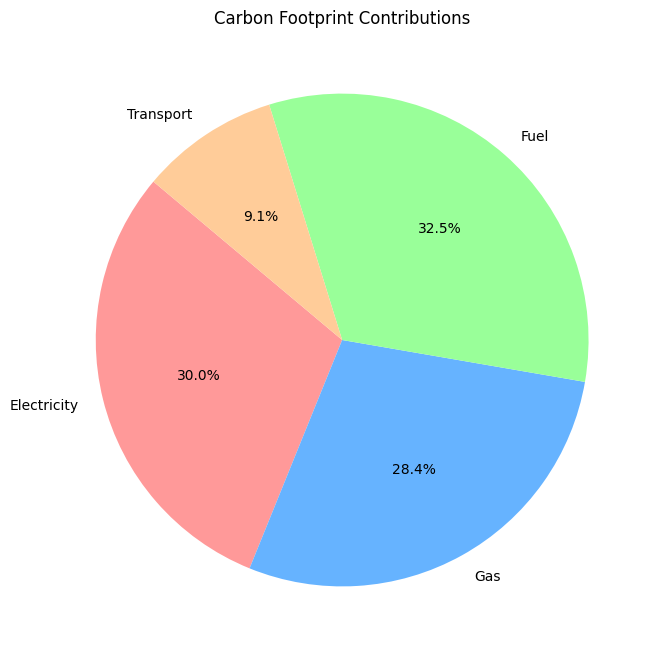


=== Carbon Footprint Monitoring Tool ===
1. Input Energy Consumption Data
2. View All Carbon Footprint Reports
3. View Summary of All Reports
4. Visualize Contributions (Pie Chart)
5. Visualize Trends (Line Chart)
6. Exit
Choose an option (1-6): 5

Numerical Figures for Carbon Footprint Over Time:
Date: 2021-05-12, Carbon Footprint: 341.1 kg CO2
Date: 2022-12-06, Carbon Footprint: 343.3 kg CO2
Date: 2023-04-23, Carbon Footprint: 411.2 kg CO2
Date: 2024-12-17, Carbon Footprint: 305.3 kg CO2


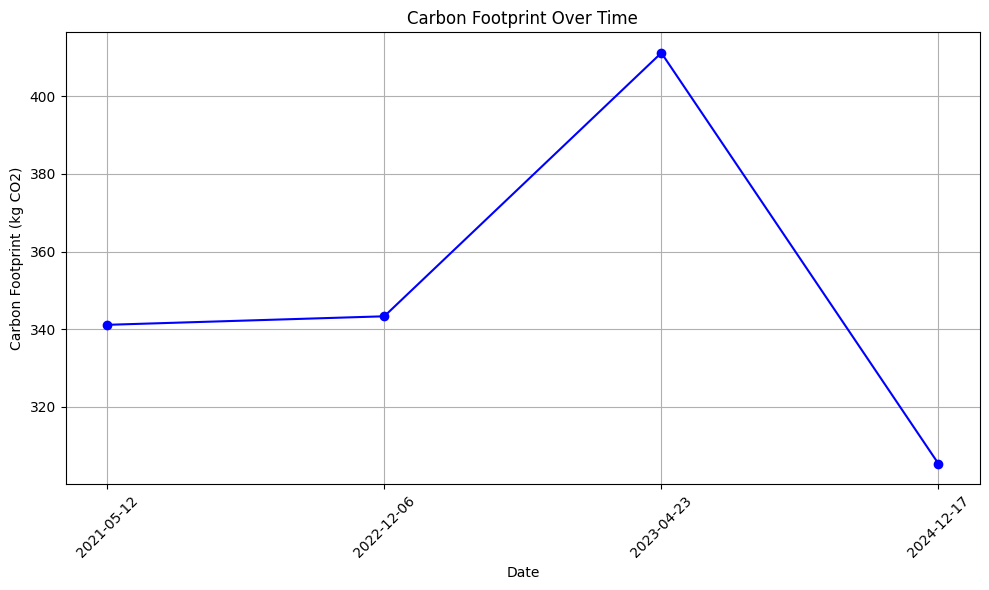


=== Carbon Footprint Monitoring Tool ===
1. Input Energy Consumption Data
2. View All Carbon Footprint Reports
3. View Summary of All Reports
4. Visualize Contributions (Pie Chart)
5. Visualize Trends (Line Chart)
6. Exit
Choose an option (1-6): 6
Exiting program. Goodbye!


In [ ]:
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def display_menu():
    print("\n=== Carbon Footprint Monitoring Tool ===")
    print("1. Input Energy Consumption Data")
    print("2. View All Carbon Footprint Reports")
    print("3. View Summary of All Reports")
    print("4. Visualize Contributions (Pie Chart)")
    print("5. Visualize Trends (Line Chart)")
    print("6. Exit")

def get_energy_data():
    """Collects energy consumption data from the user."""
    try:
        print("\nEnter Energy Consumption Data:")
        electricity = float(input("Electricity consumption (kWh): "))
        gas = float(input("Gas consumption (cubic meters): "))
        fuel = float(input("Fuel consumption (liters): "))
        transport = float(input("Transport emissions (km driven): "))

        date_input = input("Enter the date (YYYY-MM-DD) or leave blank for today: ").strip()
        if date_input:
            date = datetime.datetime.strptime(date_input, "%Y-%m-%d").date()
        else:
            date = datetime.date.today()

        data = {
            "electricity": electricity,
            "gas": gas,
            "fuel": fuel,
            "transport": transport,
            "date": str(date),
            "carbon_footprint": calculate_footprint(electricity, gas, fuel, transport)
        }
        return data
    except (ValueError, TypeError):
        print("Invalid input! Please enter numeric values and a valid date.")
        return None

def calculate_footprint(electricity, gas, fuel, transport):
    """Calculates carbon footprint based on input data."""
    # Emission factors (kg CO2 per unit)
    factors = {
        "electricity": 0.5,  # kg CO2 per kWh
        "gas": 2.0,          # kg CO2 per cubic meter
        "fuel": 2.3,         # kg CO2 per liter
        "transport": 0.15    # kg CO2 per km
    }
    footprint = (electricity * factors['electricity'] +
                 gas * factors['gas'] +
                 fuel * factors['fuel'] +
                 transport * factors['transport'])
    return round(footprint, 2)

def display_report(data):
    """Displays the carbon footprint report."""
    print("\n=== Carbon Footprint Report ===")
    print(f"Date: {data['date']}")
    print(f"Electricity Consumption: {data['electricity']} kWh")
    print(f"Gas Consumption: {data['gas']} cubic meters")
    print(f"Fuel Consumption: {data['fuel']} liters")
    print(f"Transport Emissions: {data['transport']} km")
    print(f"Total Carbon Footprint: {data['carbon_footprint']} kg CO2")

def generate_summary(reports):
    """Generates a summary of all carbon footprint reports."""
    if not reports:
        print("No reports available to summarize.")
        return

    df = pd.DataFrame(reports)
    print("\n=== Summary of All Reports ===")
    print(df)
    print("\nAverage Carbon Footprint:", df['carbon_footprint'].mean(), "kg CO2")
    print("Total Carbon Footprint:", df['carbon_footprint'].sum(), "kg CO2")

def visualize_contributions(reports):
    """Generates a pie chart for contributions of electricity, gas, fuel, and transport."""
    if not reports:
        print("No reports available to visualize.")
        return

    # Aggregate the total contributions for each category
    total_contributions = {
        "Electricity": sum(r['electricity'] * 0.5 for r in reports),
        "Gas": sum(r['gas'] * 2.0 for r in reports),
        "Fuel": sum(r['fuel'] * 2.3 for r in reports),
        "Transport": sum(r['transport'] * 0.15 for r in reports)
    }

    # Generate the pie chart
    print("\nNumerical Contributions (kg CO2):")
    for key, value in total_contributions.items():
        print(f"{key}: {round(value, 2)} kg CO2")

    labels = total_contributions.keys()
    sizes = total_contributions.values()
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title("Carbon Footprint Contributions")
    plt.show()

def visualize_trends(reports):
    """Generates a line chart showing carbon footprint over time."""
    if not reports:
        print("No reports available to visualize trends.")
        return

    # Sort reports by date
    sorted_reports = sorted(reports, key=lambda x: x['date'])
    dates = [report['date'] for report in sorted_reports]
    footprints = [report['carbon_footprint'] for report in sorted_reports]

    # Generate the line chart
    print("\nNumerical Figures for Carbon Footprint Over Time:")
    for date, footprint in zip(dates, footprints):
        print(f"Date: {date}, Carbon Footprint: {footprint} kg CO2")

    plt.figure(figsize=(10, 6))
    plt.plot(dates, footprints, marker='o', linestyle='-', color='b')
    plt.xlabel("Date")
    plt.ylabel("Carbon Footprint (kg CO2)")
    plt.title("Carbon Footprint Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

def main():
    reports = []
    while True:
        display_menu()
        choice = input("Choose an option (1-6): ")
        if choice == '1':
            data = get_energy_data()
            if data:
                reports.append(data)
                display_report(data)
        elif choice == '2':
            if not reports:
                print("\nNo reports available.")
            else:
                print("\n=== All Carbon Footprint Reports ===")
                for i, report in enumerate(reports, 1):
                    print(f"\nReport {i}:")
                    display_report(report)
        elif choice == '3':
            generate_summary(reports)
        elif choice == '4':
            visualize_contributions(reports)
        elif choice == '5':
            visualize_trends(reports)
        elif choice == '6':
            print("Exiting program. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()
